<a href="https://colab.research.google.com/github/hiauls/Dataset-Narkotika_107_267/blob/main/Amar_Putusan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/MyDrive/TKI'

/content/gdrive/MyDrive/TKI


#***LIBRARY***

In [3]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.util import ngrams, bigrams, pad_sequence, everygrams

from wordcloud import wordcloud, STOPWORDS

from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, f1_score, precision_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

%matplotlib inline

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#***LOAD DATASET***

In [7]:
df = pd.read_excel('/content/gdrive/MyDrive/TKI/overview.xlsx')
df.head()

,No,No Putusan,Lembaga Pengadilan,Barang Bukti,Amar Keputusan
0,1,28/Pid.Sus/2022/PN Jkt.Pst,PN Jakarta Pusat,1. 1(satu) bungkus plastik teh berwarna hijau ...,1. Menyatakan Terdakwa Muhammad Riansah secara...
1,2,34/Pid.Sus/2022/PN Jkt.Pst,PN Jakarta Pusat,1. 1 (satu) bungkus plastik warna hitam berisi...,1. Menyatakan Terdakwa Yoga Yosua Zaneti Mewen...
2,3,48/Pid.Sus/2021/PN Jkt.Pst,PN Jakarta Pusat,1. Sebuah bekas bungkus rokok Esse Berry Pop d...,1. Menyatakan Terdakwa Andhika Prasetya Putra ...
3,4,49/Pid.Sus/2022/PN Jkt.Pst,PN Jakarta Pusat,1. Sebuah dompet warna putih bermotif boneka b...,1. Menyatakan Terdakwa Abdul Muhyi als Uyi bin...
4,5,69/Pid.Sus/2022/PN Jkt.Pst,PN Jakarta Pusat,1. 3(Tiga) bungkus plastik klip masing-masing ...,1. Menyatakan Terdakwa Yuyu alias Bobay terbuk...


In [8]:
df.tail()

,No,No Putusan,Lembaga Pengadilan,Barang Bukti,Amar Keputusan
45,46,740/Pid.Sus/2021/PN Jkt.Pst,PN Jakarta Pusat,1. 1(satu) bungkus plastik klip berisikan kris...,1. Menyatakan terdakwa Bhatoro Indro bin Sutri...
46,47,783/Pid.Sus/2021/PN Jkt.Pst,PN Jakarta Pusat,1. 1(satu) bungkus plastik klip berisikan kris...,1. Menyatakan terdakwa Meilina telah terbukti ...
47,48,792/Pid.Sus/2021/PN Jkt.Pst,PN Jakarta Pusat,1. Tas warna merah merk Jeansport;\n2. 1(satu)...,1. Menyatakan terdakwa Mohammad Chandra Ramadl...
48,49,793/Pid.Sus/2021/PN Jkt.Pst,PN Jakarta Pusat,1. 5(lima) bungkus kertas warna coklat masing-...,1. Menyatakan terdakwa Erwin Rinaldi telah ter...
49,50,795/Pid.Sus/2021/PN Jkt.Pst,PN Jakarta Pusat,1. 3(tiga) bungkus plastik bening yang masing-...,1. Menyatakan terdakwa Deni Saputra telah terb...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   No                  50 non-null     int64 
 1   No Putusan          50 non-null     object
 2   Lembaga Pengadilan  50 non-null     object
 3   Barang Bukti        50 non-null     object
 4   Amar Keputusan      50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [11]:
df.nunique()

No                    50
No Putusan            50
Lembaga Pengadilan     1
Barang Bukti          50
Amar Keputusan        50
dtype: int64

In [15]:
df.describe()

,No
count,50.00000
mean,25.50000
std,14.57738
min,1.00000
25%,13.25000
50%,25.50000
75%,37.75000
max,50.00000


#***NORMALIZATION***

##*LOWERCASE*

In [17]:
df.loc[:, 'Amar Keputusan'] = df.loc[:, 'Amar Keputusan'].apply(lambda x: ' '.join(x.lower()for x in x.split()))
df.head()

,No,No Putusan,Lembaga Pengadilan,Barang Bukti,Amar Keputusan
0,1,28/Pid.Sus/2022/PN Jkt.Pst,PN Jakarta Pusat,1. 1(satu) bungkus plastik teh berwarna hijau ...,1. menyatakan terdakwa muhammad riansah secara...
1,2,34/Pid.Sus/2022/PN Jkt.Pst,PN Jakarta Pusat,1. 1 (satu) bungkus plastik warna hitam berisi...,1. menyatakan terdakwa yoga yosua zaneti mewen...
2,3,48/Pid.Sus/2021/PN Jkt.Pst,PN Jakarta Pusat,1. Sebuah bekas bungkus rokok Esse Berry Pop d...,1. menyatakan terdakwa andhika prasetya putra ...
3,4,49/Pid.Sus/2022/PN Jkt.Pst,PN Jakarta Pusat,1. Sebuah dompet warna putih bermotif boneka b...,1. menyatakan terdakwa abdul muhyi als uyi bin...
4,5,69/Pid.Sus/2022/PN Jkt.Pst,PN Jakarta Pusat,1. 3(Tiga) bungkus plastik klip masing-masing ...,1. menyatakan terdakwa yuyu alias bobay terbuk...


##*STOPWORDS*

In [18]:
stop_words = stopwords.words('english')
df.loc[:,'Amar Keputusan'] = df.loc[:,'Amar Keputusan'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words))
df.head()

,No,No Putusan,Lembaga Pengadilan,Barang Bukti,Amar Keputusan
0,1,28/Pid.Sus/2022/PN Jkt.Pst,PN Jakarta Pusat,1. 1(satu) bungkus plastik teh berwarna hijau ...,1. menyatakan terdakwa muhammad riansah secara...
1,2,34/Pid.Sus/2022/PN Jkt.Pst,PN Jakarta Pusat,1. 1 (satu) bungkus plastik warna hitam berisi...,1. menyatakan terdakwa yoga yosua zaneti mewen...
2,3,48/Pid.Sus/2021/PN Jkt.Pst,PN Jakarta Pusat,1. Sebuah bekas bungkus rokok Esse Berry Pop d...,1. menyatakan terdakwa andhika prasetya putra ...
3,4,49/Pid.Sus/2022/PN Jkt.Pst,PN Jakarta Pusat,1. Sebuah dompet warna putih bermotif boneka b...,1. menyatakan terdakwa abdul muhyi als uyi bin...
4,5,69/Pid.Sus/2022/PN Jkt.Pst,PN Jakarta Pusat,1. 3(Tiga) bungkus plastik klip masing-masing ...,1. menyatakan terdakwa yuyu alias bobay terbuk...


##*LEMMATIZE*

In [19]:
lemmat = WordNetLemmatizer()
df.loc[:,'Amar Keputusan'] = df.loc[:,'Amar Keputusan'].apply(lambda word: " ".join(lemmat.lemmatize(word) for word in word.split()))
df.head()

,No,No Putusan,Lembaga Pengadilan,Barang Bukti,Amar Keputusan
0,1,28/Pid.Sus/2022/PN Jkt.Pst,PN Jakarta Pusat,1. 1(satu) bungkus plastik teh berwarna hijau ...,1. menyatakan terdakwa muhammad riansah secara...
1,2,34/Pid.Sus/2022/PN Jkt.Pst,PN Jakarta Pusat,1. 1 (satu) bungkus plastik warna hitam berisi...,1. menyatakan terdakwa yoga yosua zaneti mewen...
2,3,48/Pid.Sus/2021/PN Jkt.Pst,PN Jakarta Pusat,1. Sebuah bekas bungkus rokok Esse Berry Pop d...,1. menyatakan terdakwa andhika prasetya putra ...
3,4,49/Pid.Sus/2022/PN Jkt.Pst,PN Jakarta Pusat,1. Sebuah dompet warna putih bermotif boneka b...,1. menyatakan terdakwa abdul muhyi al uyi bin ...
4,5,69/Pid.Sus/2022/PN Jkt.Pst,PN Jakarta Pusat,1. 3(Tiga) bungkus plastik klip masing-masing ...,1. menyatakan terdakwa yuyu alias bobay terbuk...


##*REMOVE URL & TAGS*

In [20]:
df["Amar Keputusan"]=df["Amar Keputusan"].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))
df.head()

,No,No Putusan,Lembaga Pengadilan,Barang Bukti,Amar Keputusan
0,1,28/Pid.Sus/2022/PN Jkt.Pst,PN Jakarta Pusat,1. 1(satu) bungkus plastik teh berwarna hijau ...,1. menyatakan terdakwa muhammad riansah secara...
1,2,34/Pid.Sus/2022/PN Jkt.Pst,PN Jakarta Pusat,1. 1 (satu) bungkus plastik warna hitam berisi...,1. menyatakan terdakwa yoga yosua zaneti mewen...
2,3,48/Pid.Sus/2021/PN Jkt.Pst,PN Jakarta Pusat,1. Sebuah bekas bungkus rokok Esse Berry Pop d...,1. menyatakan terdakwa andhika prasetya putra ...
3,4,49/Pid.Sus/2022/PN Jkt.Pst,PN Jakarta Pusat,1. Sebuah dompet warna putih bermotif boneka b...,1. menyatakan terdakwa abdul muhyi al uyi bin ...
4,5,69/Pid.Sus/2022/PN Jkt.Pst,PN Jakarta Pusat,1. 3(Tiga) bungkus plastik klip masing-masing ...,1. menyatakan terdakwa yuyu alias bobay terbuk...


#***TF-IDF***

In [35]:
X = df['Amar Keputusan']
y = df['Barang Bukti']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35,), (15,), (35,), (15,))

In [36]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [37]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [43]:
y_pred = model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [50]:
report = classification_report(y_test, y_pred)
print("Classification Report:", report)

Classification Report:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

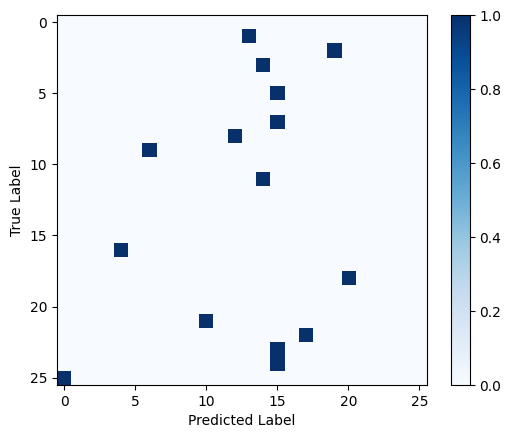

In [53]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(set(y)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()